<a href="https://www.kaggle.com/code/sherifsamyabdelkarem/titanic-analysis-classification?scriptVersionId=195994196" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

<img src="header.png">

In [2]:
df = pd.read_csv(r"/kaggle/input/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
mean_value = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_value)

In [9]:
df['Embarked'] = df['Embarked'].fillna('S')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df = df.drop(['Name'],axis=1)
df = df.drop(['Ticket'],axis=1)
df = df.drop(['Cabin'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [13]:
# --> male = 0 , female = 1
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

/tmp/ipykernel_17/3647074721.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


In [14]:
df['Sex'] = df['Sex'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [16]:
# C = 0 , Q = 1 , S = 2
df['Embarked'] = df['Embarked'].replace({'C': 0, 'Q': 1 , 'S':2})
df['Embarked'] = df['Embarked'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


/tmp/ipykernel_17/1303196074.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace({'C': 0, 'Q': 1 , 'S':2})


In [17]:
df.to_csv('Cleaned_titanic.csv', index=False)

# Exploratory Data Analysis (EDA)

Explore the relationships between variables and identify patterns Relationship between survival and other variables

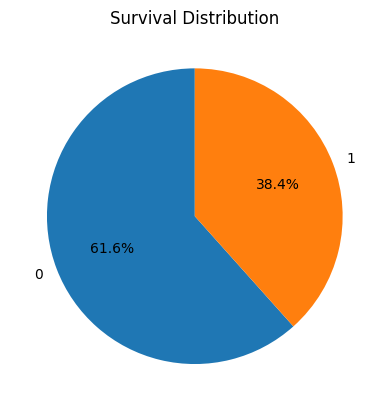

In [18]:
# plt.pie(df['Survived'].value_counts())

plt.pie(df['Survived'].value_counts(),
        labels = df['Survived'].value_counts().index,
        autopct = '%1.1f%%',
        startangle=90)

plt.title('Survival Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


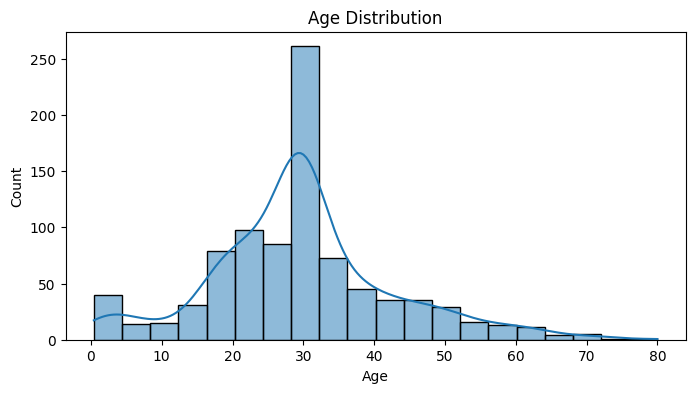

In [19]:
# Explore the distribution of passengers' ages
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


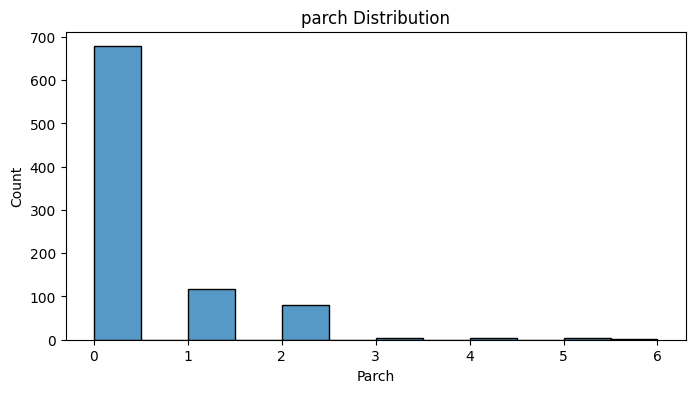

In [20]:
# parch of parents / children aboard the Titanic

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Parch', bins=12)
plt.title("parch Distribution")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


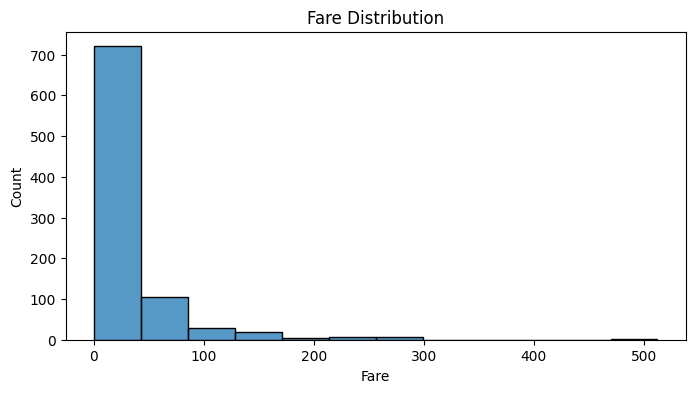

In [21]:
# fare	Passenger fare

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Fare', bins=12)
plt.title("Fare Distribution")
plt.show()

<Axes: >

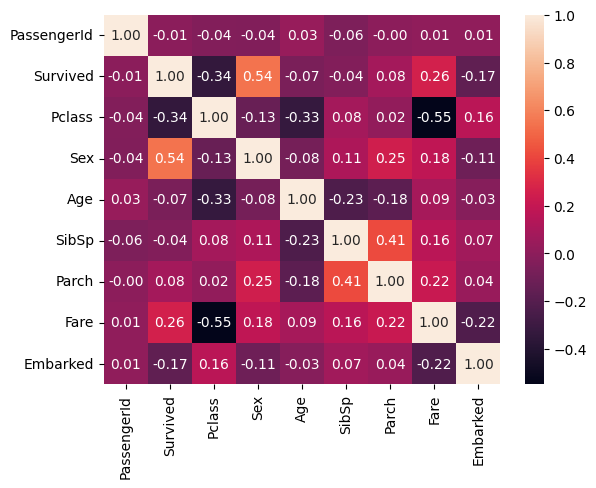

In [22]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

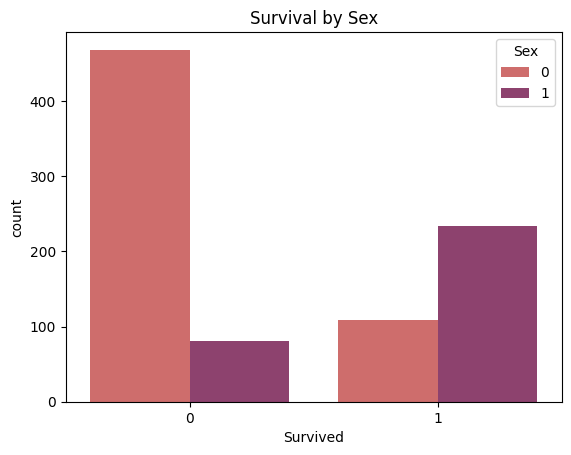

In [23]:
sns.countplot(x="Survived", hue="Sex", data=df ,palette='flare')
plt.title("Survival by Sex")
plt.show()

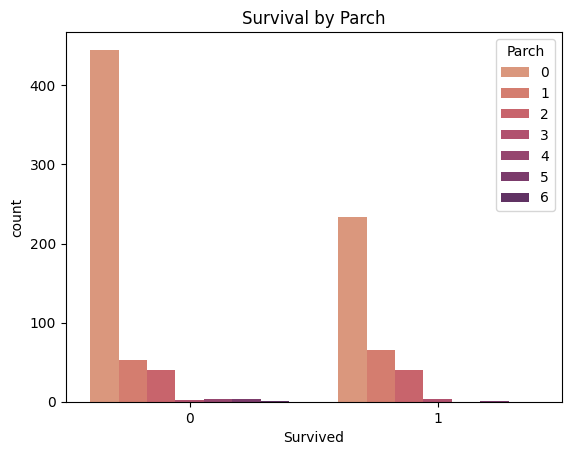

In [24]:
sns.countplot(x = 'Survived' , hue = 'Parch' ,data = df ,palette='flare')
plt.title("Survival by Parch")
plt.show()

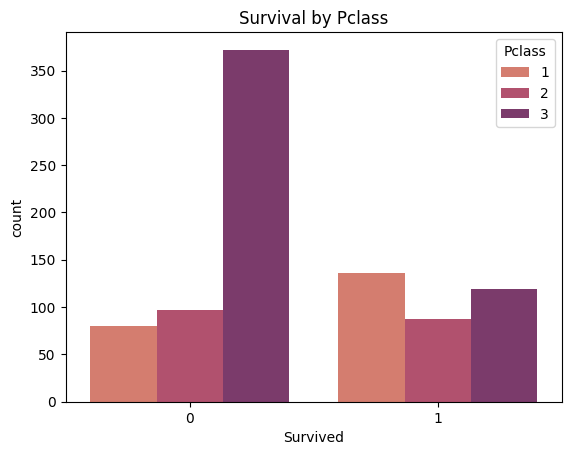

In [25]:
sns.countplot(x = 'Survived' , hue = 'Pclass' ,data = df ,palette='flare')
plt.title("Survival by Pclass")
plt.show()

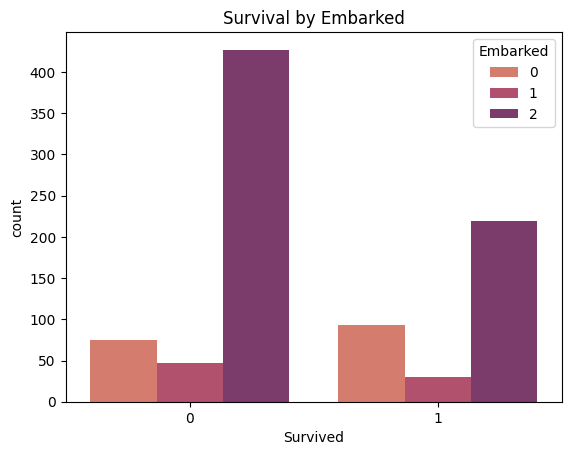

In [26]:
sns.countplot(x = 'Survived' , hue = 'Embarked' ,data = df ,palette='flare')
plt.title("Survival by Embarked")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


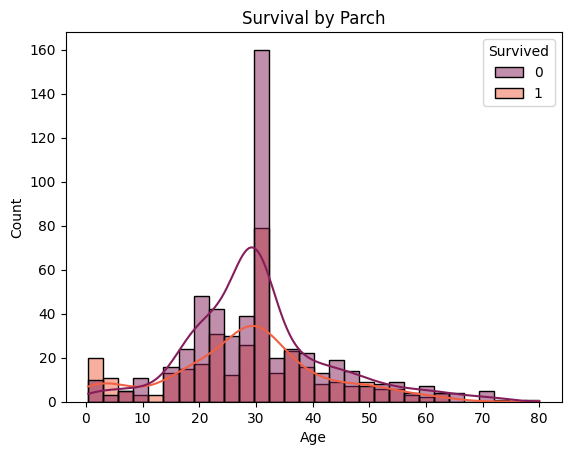

In [27]:
sns.histplot(x = 'Age' , hue = 'Survived' ,data = df ,kde=True ,palette='rocket')
plt.title("Survival by Parch")
plt.show()

# modling

### 1- LogisticRegression

In [28]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train , x_test , y_train ,y_test = train_test_split(x,y ,test_size=0.3)

In [29]:
LRM = LogisticRegression(penalty='l2',max_iter=100,solver='newton-cholesky')
LRM

LogisticRegression(solver='newton-cholesky')

In [30]:
LRM.fit(x_train,y_train)
LRM.score(x_train,y_train)

0.8089887640449438

In [31]:
LRM.score(x_test,y_test)

0.7947761194029851

In [32]:
y_pred = LRM.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1])

<Axes: >

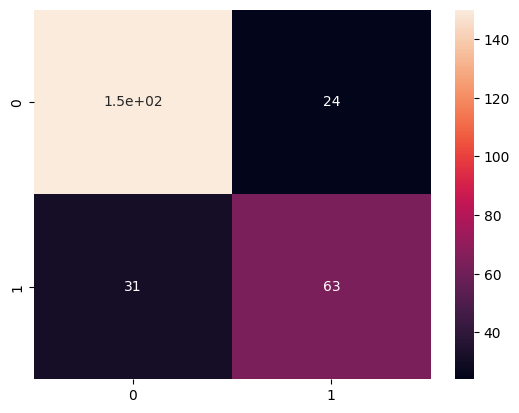

In [33]:
CM =confusion_matrix(y_test,y_pred)

sns.heatmap(CM,annot=True)

### 2- SVC

In [34]:
SVC = SVC(C=10 ,kernel='linear')
SVC.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [35]:
SVC.score(x_train,y_train)

0.8089887640449438

In [36]:
SVC.score(x_test,y_test)

0.7910447761194029

In [37]:
y_pred = SVC.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1])

<Axes: >

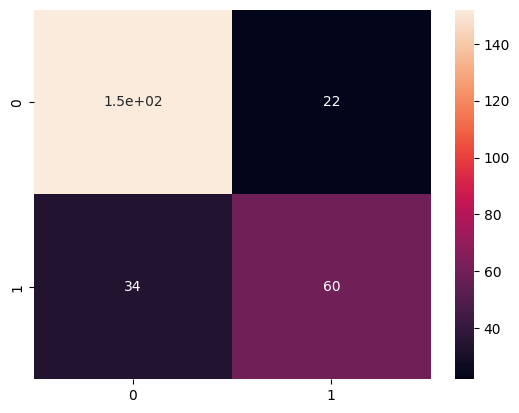

In [38]:
CM =confusion_matrix(y_test,y_pred)

sns.heatmap(CM,annot=True)

### 3- Neural Network

In [39]:
MLPC = MLPClassifier(activation='identity',
                     solver='lbfgs',
                     alpha=0.0001,
                     batch_size='auto',
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     power_t=0.5,
                     max_iter=200)

MLPC.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', solver='lbfgs')

In [40]:
y_prid = MLPC.predict(x_test)

In [41]:
accuracy_score(y_test,y_prid)

0.7835820895522388

<Axes: >

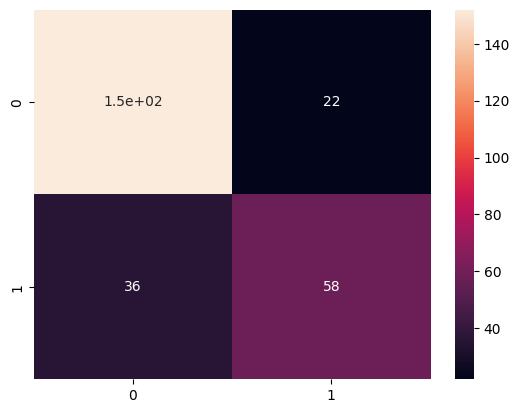

In [42]:
CM =confusion_matrix(y_test,y_prid)

sns.heatmap(CM,annot=True)

### 4- K-Means

In [43]:
km = KMeans(n_clusters=2)

In [44]:
x['cluster'] = km.fit_predict(x)
x['cluster']

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0      1
1      1
2      1
3      1
4      1
      ..
886    0
887    0
888    0
889    0
890    0
Name: cluster, Length: 891, dtype: int32

In [45]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cluster
0,1,3,0,22.000000,1,0,7.2500,2,1
1,2,1,1,38.000000,1,0,71.2833,0,1
2,3,3,1,26.000000,0,0,7.9250,2,1
3,4,1,1,35.000000,1,0,53.1000,2,1
4,5,3,0,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,2,0
887,888,1,1,19.000000,0,0,30.0000,2,0
888,889,3,1,29.699118,1,2,23.4500,2,0
889,890,1,0,26.000000,0,0,30.0000,0,0


In [46]:
CM = confusion_matrix(df['Survived'],x['cluster'])
CM

array([[278, 271],
       [167, 175]])

# the best Model is LogisticRegression
with accuracy --> 84%